### Python for street networks part 2

In [3]:
# get the modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import networkx as nx

from sklearn.neighbors import KDTree
import folium
ox.config(use_cache=True, log_console=True)
print (ox.__version__)
print (nx.__version__)

# paths
OUTPUT_PATH = '../images/'

0.8.1
2.1


### let's work on the full Amsterdam street network

In [4]:
# nice site to get bounding boxes: https://boundingbox.klokantech.com/
# bbox = min Longitude , min Latitude , max Longitude , max Latitude
bbox_ams_4326 = [4.780453, 52.29726, 5.020436, 52.427875]
bbox_ams_osm = [52.427875, 52.29726, 5.020436, 4.780453] # N, S, E, W 

G = ox.graph_from_bbox(bbox_ams_osm[0], bbox_ams_osm[1], bbox_ams_osm[2], bbox_ams_osm[3], 
                       simplify=True, network_type='all', name='Amsterdam')

In [5]:
crs_init = {'init' : 'epsg:4326'}
df_nodes, df_edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

In [8]:
df_nodes.head(2)

,highway,osmid,ref,x,y,geometry
1559232515,NaN,1559232515,NaN,4.94956,52.3559,POINT (4.9495634 52.3558504)
1379352882,NaN,1379352882,NaN,4.87845,52.3172,POINT (4.8784525 52.3172188)


In [9]:
df_edges

,area,bridge,geometry,highway,junction,key,lanes,length,level,maxspeed,maxweight,name,oneway,osmid,ref,service,tunnel,u,v
0,NaN,NaN,"LINESTRING (4.9495634 52.3558504, 4.9495304 52...",footway,NaN,0,NaN,8.969,NaN,NaN,NaN,NaN,False,142475820,NaN,NaN,NaN,1559232515,1559232441
1,NaN,NaN,"LINESTRING (4.9495634 52.3558504, 4.9497405 52...",footway,NaN,0,NaN,13.136,NaN,NaN,NaN,NaN,False,142475832,NaN,NaN,NaN,1559232515,1559232524
2,NaN,NaN,"LINESTRING (4.9495634 52.3558504, 4.949373 52....",footway,NaN,0,NaN,23.069,NaN,NaN,NaN,NaN,False,142475832,NaN,NaN,NaN,1559232515,1559232530
3,NaN,NaN,"LINESTRING (4.8784525 52.3172188, 4.8785623 52...",tertiary,NaN,0,NaN,7.788,NaN,50,NaN,Saskia van Uylenburgweg,True,7361860,NaN,NaN,NaN,1379352882,46151416
4,NaN,NaN,"LINESTRING (4.8784525 52.3172188, 4.8785099 52...",cycleway,roundabout,0,NaN,5.622,NaN,NaN,NaN,NaN,True,50223242,NaN,NaN,NaN,1379352882,638379419
5,NaN,NaN,"LINESTRING (4.8813357 52.3133262, 4.8812979 52...",unclassified,NaN,0,NaN,71.100,NaN,50,NaN,Frits Mullerlaan,False,7361787,NaN,NaN,NaN,46137349,46139758
6,NaN,NaN,"LINESTRING (4.8813357 52.3133262, 4.8814696 52...",residential,NaN,0,NaN,9.342,NaN,30,NaN,Riek Blokland-Paterlaan,False,7361797,NaN,NaN,NaN,46137349,724099154
7,NaN,yes,"LINESTRING (4.8813357 52.3133262, 4.881432 52....",service,NaN,0,NaN,175.570,NaN,50,NaN,Frits Mullerlaan,False,"[43276223, 306298982, 306298983]",NaN,NaN,NaN,46137349,46131662
8,NaN,NaN,"LINESTRING (4.9497405 52.3558029, 4.9498397 52...",footway,NaN,0,NaN,12.992,NaN,NaN,NaN,NaN,False,142475812,NaN,NaN,NaN,1559232524,1559232430
9,NaN,NaN,"LINESTRING (4.9497405 52.3558029, 4.9498478 52...",footway,NaN,0,NaN,10.054,NaN,NaN,NaN,NaN,False,142475832,NaN,NaN,NaN,1559232524,1559232533


In [13]:
df_edges = df_edges.rename(columns ={'highway': 'fclass'})

# clean up fclass
df_edges['fclass'] = \
[row[0] if isinstance(row, list) and row[0] != 'unclassified' else \
 row[1] if isinstance(row, list) and row[1] != 'unclassified' else \
 row for row in df_edges.fclass]

# clean up bridge
df_edges['bridge'] = ['viaduct' if isinstance(row, list) and row[0] != 'viaduct' else \
 'movable' if isinstance(row, list) and row[1] != 'movable' else \
 row for row in df_edges.bridge]

# clean up tunnel
df_edges['tunnel'] = ['building_passage' if isinstance(row, list) and \
                      row[0] != 'building_passage' else \
                      row for row in df_edges.tunnel]
df_edges['tunnel'] = [np.nan if isinstance(row, list) else row for row in df_edges.tunnel]
df_edges.loc[df_edges.tunnel == 'no', 'tunnel'] = np.nan

# clean up osmid
df_edges['osmid'] = [row[0] if isinstance(row, list) else row for row in df_edges.osmid]

# levels to be put on -1
level_minus = df_edges.tunnel.value_counts().keys().tolist()
# levels to be put on 1
level_plus = df_edges.bridge.value_counts().keys().tolist()

df_edges['level'] = 0
# assign level -1 to tunnels
df_edges.loc[df_edges.tunnel.isin(level_minus), 'level'] = -1
# assign level 1 to bridges
df_edges.loc[df_edges.bridge.isin(level_plus), 'level'] = 1

In [14]:
# convert to 28992
crs_convert = {'init': 'epsg:28992'}
df_edges['geometry'] = df_edges['geometry'].to_crs(crs_convert)

drop_cols =['u', 'v']
for col in drop_cols:
    df_edges = df_edges.drop(col, axis=1)

Column	Description	Data type
- `bridge`	--> Bridge feature	boolean
- `geometry`	--> Geometry of the feature	Shapely.geometry
- `highway`	--> Tag for roads, paths (road type)	str (list if multiple)
- `lanes`	--> Number of lanes	int (or nan)
- `lenght`	--> The length of a feature in meters	float
- `maxspeed`	--> maximum legal speed limit	int (list if multiple)
- `name`	--> Name of the (street) element	str (or nan)
- `oneway`	--> Street is usable only in one direction	boolean
- `osmid`	--> Unique node ids of the element	list
- `u`	--> The first node of networkx edge tuple	int
- `v`	--> The last node of networkx edge tuple	int

Most of the attributes comes directly from the OpenStreetMap, however, columns `u` and `v` are networkx specific ids.

In [16]:
df_edges.head(1)

,area,bridge,geometry,fclass,junction,key,lanes,length,level,maxspeed,maxweight,name,oneway,osmid,ref,service,tunnel
0,NaN,NaN,LINESTRING (125185.3020170565 485417.894312033...,footway,NaN,0,NaN,8.969,0,NaN,NaN,NaN,False,142475820,NaN,NaN,NaN


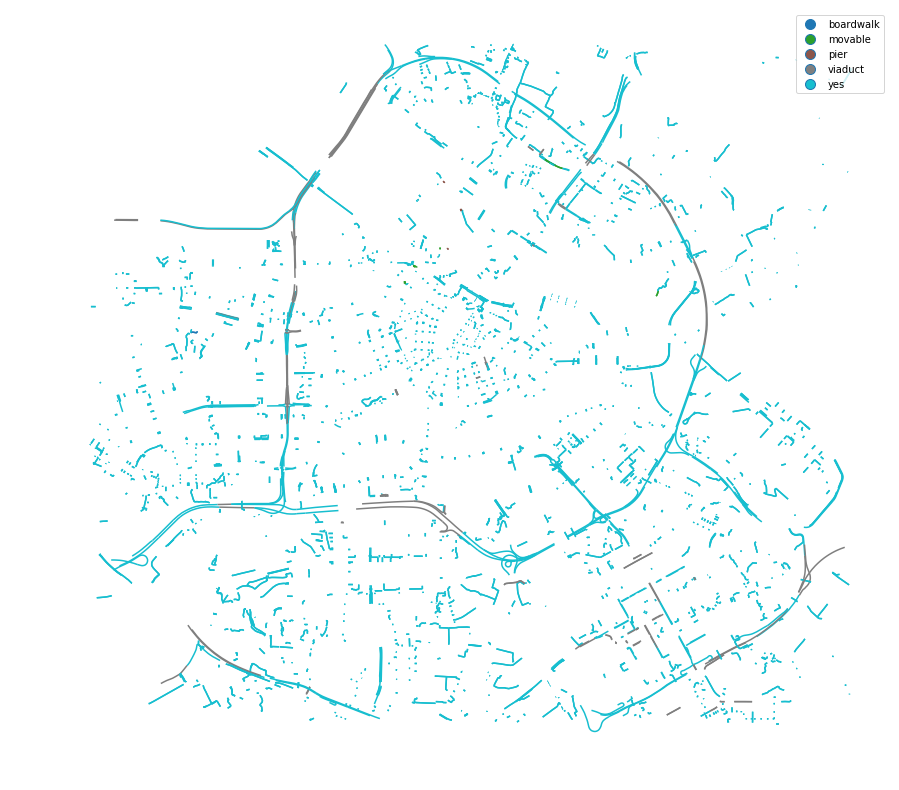

In [19]:
# level 1
f, ax = plt.subplots(figsize=[15,15])
df_edges.query("level == 1").plot(ax=ax, column = 'bridge', legend=True)
ax.set_axis_off()

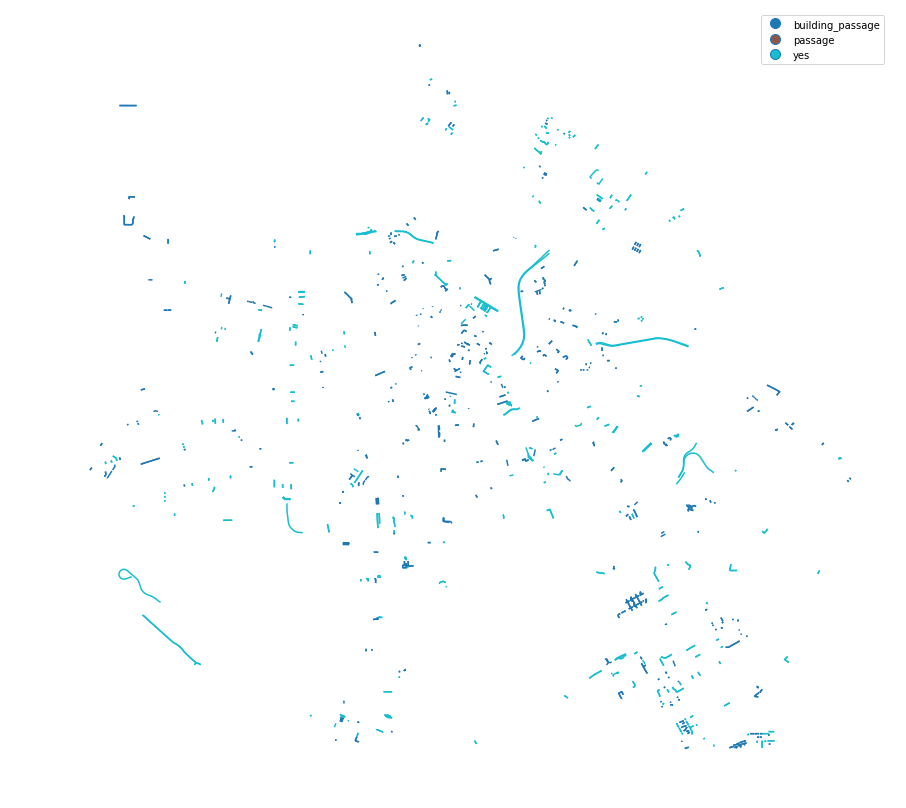

In [20]:
# level -1
f, ax = plt.subplots(figsize=[15,15])
df_edges.query("level == -1").plot(ax=ax, column = 'tunnel', legend=True)
ax.set_axis_off()

**manipulate and load_to_postgres for further analysis in QGIS etc..**

See nice open-sourced scripts from github Amsterdam `data-processing`

https://github.com/Amsterdam/data-processing/tree/master/src/datapunt_processing/load